# Statistics
* In this file statistics and other related, useful information will be generated about our Tracks' data.
* Specifically, we will use **inferential statistic methods** to study how features (track and possibly audio) influence valence.

## Import packages
* To begin with, we will import the packages, that we will use in the following segments of the project:
    * [pandas](https://pandas.pydata.org/)
    * [matplotlib](https://matplotlib.org/)
    * [NumPy](https://www.numpy.org/)
    * [statsmodels](https://www.statsmodels.org/stable/index.html)
    * [scikit-learn](https://scikit-learn.org/stable/)
* Note that the prementioned packages **must be locally installed too** in order to be used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Data Load
* We will use the files created in the <code>data_preparation</code> notebook.
* This files can be found in the <code>data</code> folder.
* Especially, we will load the following:
  * <code>tracks.csv</code>
  * <code>analyses_downsampled.csv</code>

In [2]:
tracks = pd.read_csv('data/tracks.csv', index_col=0)
analyses_ds = pd.read_csv('data/analyses_downsampled.csv', index_col=0)

* We will merge these two files, in order to have the data into a single one.

In [3]:
full_tracks = tracks.join(analyses_ds)
full_tracks.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,timbre_7_std_mid,timbre_8_std_mid,timbre_9_std_mid,timbre_10_std_mid,timbre_11_std_mid,timbre_12_std_mid,loudness_start_std_mid,loudness_max_std_mid,loudness_max_time_std_mid,duration_std_mid
id,,,,,,,,,,,,,,,,,,,,,
0AJfVstyUONRJhyYgTkHMR,0.253,0.385,-8.031,0,0.0341,0.729,0.000000,0.0428,0.6460,203.512,...,31.028081,21.500966,18.934411,19.095865,14.053563,16.839561,4.294521,3.070072,0.046489,0.104830
1V3NH8aYfFyRjfNOHgoX3G,0.219,0.222,-16.941,1,0.0390,0.978,0.000149,0.0837,0.0632,72.999,...,22.268559,11.564204,19.853243,9.968599,12.719616,23.051455,5.631639,5.568326,0.077225,0.259447
4kfEy7h6bWBS5OaDpccTap,0.846,0.651,-5.481,0,0.1280,0.634,0.000000,0.1250,0.5810,140.048,...,28.513058,29.713144,17.411532,23.796638,22.653034,18.470448,5.112536,2.455965,0.034787,0.084622
7qgM0MdETmhd3mORTqvJRm,0.398,0.255,-11.205,1,0.0373,0.944,0.000003,0.1140,0.3860,83.883,...,23.401036,22.397868,17.243494,16.434974,19.959498,13.918116,5.835958,5.094191,0.066420,0.140004
1HtgEaqki4dFclmVJlJDx1,0.612,0.579,-7.264,1,0.0269,0.606,0.000009,0.3530,0.8100,136.641,...,24.076927,18.603327,15.858383,13.746648,16.996667,16.838443,4.014044,3.318366,0.037726,0.137322


* Also we will create two lists that will contain the variables that we will use as **independent** for our statistical analyses:
  * <code>basic_independent</code>: contains the columns of <code>tracks</code> dataframe, without: <code>valence</code>, as it is the target variable and <code>key_11</code>, because we created dummy variables for the *key* and in statistics we use n-1 of them (n being the number of dummies).
  * <code>full_independent</code>: extend <code>basic_independent</code> by also including all the downsampled data from the *Spotify Analyses*.

In [4]:
basic_independent = tracks.columns.drop(['valence', 'key_11'])
full_independent = full_tracks.columns.drop(['valence', 'key_11'])

## Basic Independent - Plots
* We will create some scatterplots about the basic independent variables, in order to understand better their correlation with *valence*.

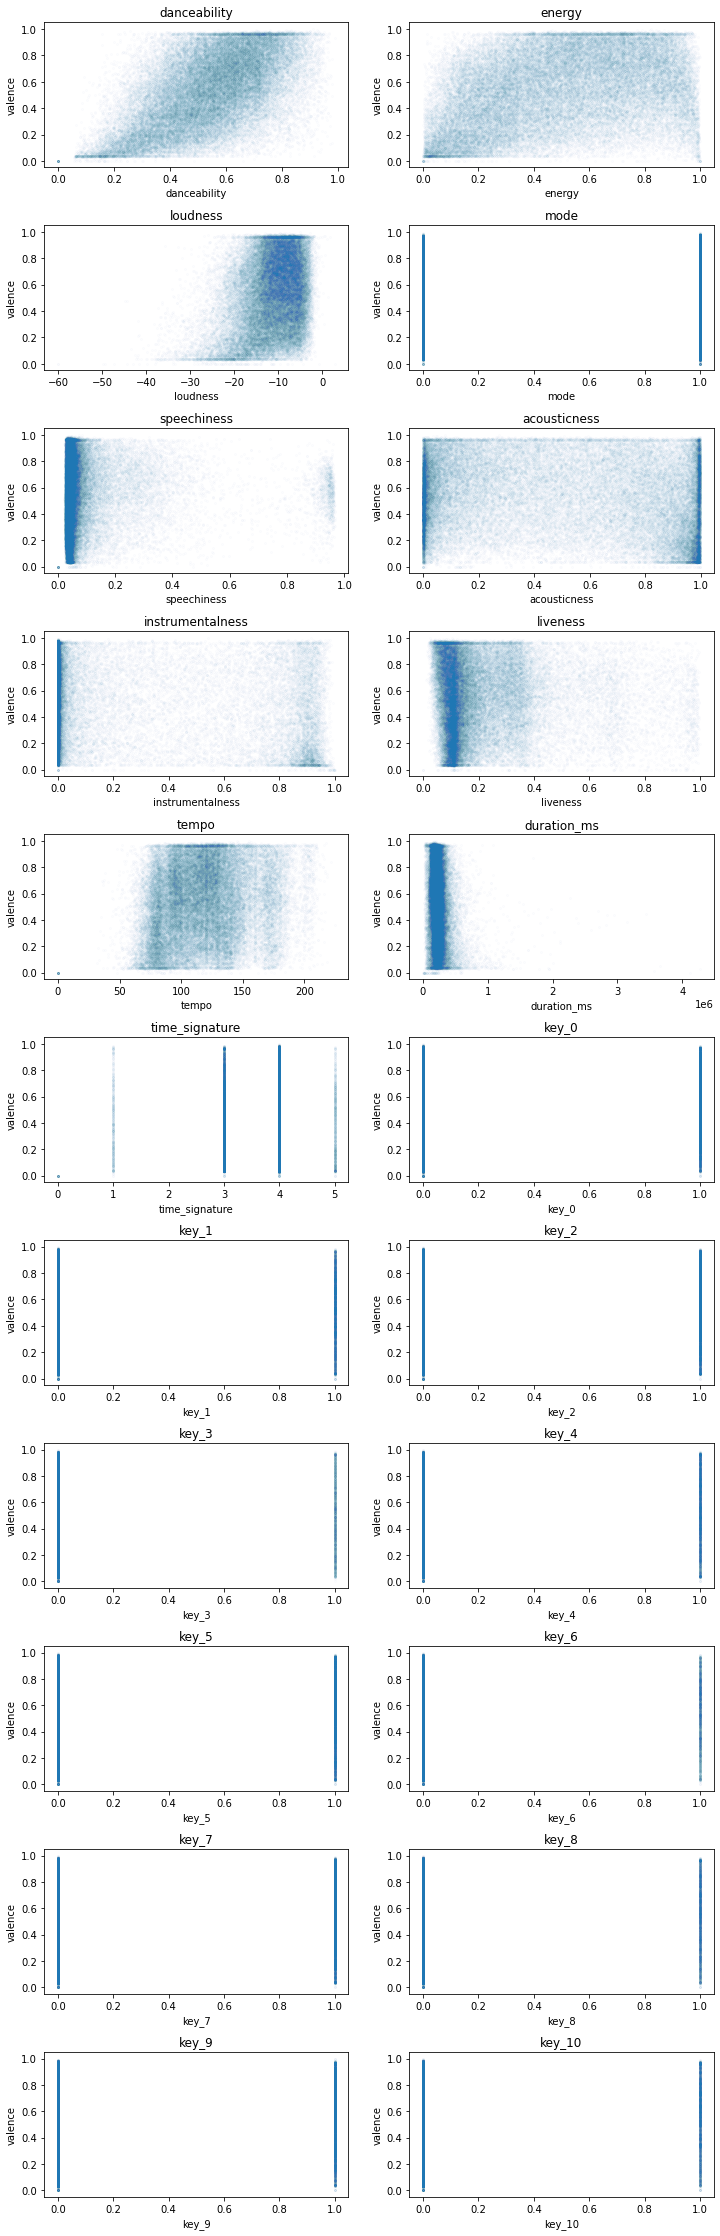

In [5]:
plt.figure(figsize=(12, 40))
plt.subplots_adjust(hspace=0.4)

for i, var in enumerate(basic_independent):
    plt.subplot(int(len(basic_independent)/2), 2, i + 1)
    plt.scatter(full_tracks[[var]], full_tracks[['valence']], label=var, s=5, alpha=0.01)
    plt.xlabel(var)
    plt.ylabel('valence')

    plt.title(var)

* We can observe that some relationships seem to be **non-linear**.
* We will try to handle this later.

## Basic Linear Regression
* We will now do a first linear regression using our <code>basic_independent</code>.

In [6]:
basic_formula = 'valence ~ ' + '+'.join(basic_independent)
basic_mod = smf.ols(formula=basic_formula, data=full_tracks)
basic_lr_res = basic_mod.fit()
basic_lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     2008.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:09:26   Log-Likelihood:                 11730.
No. Observations:               54994   AIC:                        -2.341e+04
Df Residuals:                   54971   BIC:                        -2.321e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4080      0.011    -37.566      0.000      -0.429      -0.387
danceability         0.8319      0.005    152.358      0.000       0.821       0.843
energy               0.5090      0.007     77.622      0.000       0.496       0.522
loudness            -0.0064      0.000    -24.527      0.000      -0.007      -0.006
mode                 0.0186      0.002      9.820      0.000       0.015       0.022
speechiness         -0.0751      0.006    -12.435      0.000      -0.087      -0.063
acousticness         0.2017      0.004     56.959      0.000       0.195       0.209
instrumentalness    -0.0193      0.003     -6.165      0.000      -0.025      -0.013
liveness             0.0179      0.005      3.593      0.000       0.008       0.028
tempo                0.0011   2.82e-05     38.148      0.000       0.001       0.001
duration_ms       -2.59e-07   7.01e-09    -36.944      0.000   -2.73e-07   -2.45e-07
time_signature      -0.0027      0.002     -1.544      0.123      -0.006       0.001
key_0                0.0125      0.004      2.976      0.003       0.004       0.021
key_1               -0.0321      0.005     -7.049      0.000      -0.041      -0.023
key_2                0.0114      0.004      2.687      0.007       0.003       0.020
key_3                0.0149      0.005      2.778      0.005       0.004       0.025
key_4                0.0119      0.005      2.595      0.009       0.003       0.021
key_5                0.0183      0.004      4.199      0.000       0.010       0.027
key_6               -0.0064      0.005     -1.274      0.203      -0.016       0.003
key_7                0.0184      0.004      4.399      0.000       0.010       0.027
key_8                0.0003      0.005      0.073      0.942      -0.009       0.010
key_9                0.0183      0.004      4.290      0.000       0.010       0.027
key_10               0.0169      0.005      3.654      0.000       0.008       0.026
==============================================================================
Omnibus:                      331.865   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.456
Skew:                          -0.181   Prob(JB):                     6.43e-73
Kurtosis:                       2.881   Cond. No.                     4.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression with non-linear functions
* As we can observe from the plots above, it seems that some of the relationships between independent variables and valence are not linear.
* We will try to find a better fit by **applying a function** on the independent variables.
* First we will create a class for the Relationships and we will declare the relationship functions.

In [7]:
def square(x): return np.power(x, 2)
def square_root(x): return np.sqrt(x)
def log_two(x): return np.log2(x + 10**-10)
def two_raised(x): return np.power(2, x)
def same(x): return x

class Relationship_Function:
    funcs = []
    def __init__(self, func, str_func):
        self.func = func
        self.str_func = str_func
        Relationship_Function.funcs.append(self)

Relationship_Function(square, 'square')
Relationship_Function(square_root, 'square_root')
Relationship_Function(log_two, 'log_two')
Relationship_Function(two_raised, 'two_raised')
Relationship_Function(same, 'same')

for func in Relationship_Function.funcs:
    print(func.str_func)

square
square_root
log_two
two_raised
same


* Here we must be cautious. As one of the functions is the square root we have to ensure that none of the values is negative.

In [8]:
(tracks[basic_independent] < 0).sum()

danceability            0
energy                  0
loudness            54984
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
tempo                   0
duration_ms             0
time_signature          0
key_0                   0
key_1                   0
key_2                   0
key_3                   0
key_4                   0
key_5                   0
key_6                   0
key_7                   0
key_8                   0
key_9                   0
key_10                  0
dtype: int64

* It looks like loudness has many negative values.
* We will make them positive by adding the minimum value to all the others.
* So we will create a new dataframe.

In [9]:
min_loudness = tracks['loudness'].min()
pos_tracks = tracks.copy()
pos_tracks['loudness'] = pos_tracks['loudness'].map(lambda x: x - min_loudness)
pos_tracks.drop(columns='key_11')
(pos_tracks['loudness'] < 0).sum()

0

* Then we will try to identify which of the declared functions explain better the relationship of each independent variable with valence.
* To do that we will use two methods:
  * **Method 1**: the largest R squared for a model that contains only the independent variable that we work on, to explain valence.
  * **Method 2**: the largest ehnancement on the R squared caused by the addition to a model that includes all the other basic independent variables. In order to avoid unnecessary complexity, we will keep all the other variables without a function applied on them. What we are trying to do here, is to find the relationship that best describes the variance of valence that the other variables cannot explain.
* Again here we will create a new Class and call static methods.


In [10]:
class Metric:
    relationship_mapping = {}
    def __init__(self, ind_var, df):
        self.rel_func = []
        self.rel_func.append(Metric.find_best_rel_func_1(ind_var, df))
        self.rel_func.append(Metric.find_best_rel_func_2(ind_var, df))
        Metric.relationship_mapping[ind_var] = self
    
    def get_func(self, mode):
        return self.rel_func[mode].func
    
    def get_str_func(self, mode):
        return self.rel_func[mode].str_func
    
    @staticmethod
    def find_best_rel_func_1(ind_var, df):
        best_r2 = -1
        best_rel_func = None
        for func in Relationship_Function.funcs:
            formula = 'valence ~ {}({})'.format(func.str_func, ind_var)
            cand_r2 = Metric.get_r2(formula, df)
            if cand_r2 > best_r2:
                best_rel_func = func
                best_r2 = cand_r2
        return best_rel_func
    
    @staticmethod
    def find_best_rel_func_2(ind_var, df):
        best_r2_enh = -1
        best_rel_func = None
        other_independent = [x for x in basic_independent if x != ind_var]
        formula_other = 'valence ~ ' + '+'.join(other_independent)
        r2_other = Metric.get_r2(formula_other, df)
        for func in Relationship_Function.funcs:
            formula_with = formula_other + '+{}({})'.format(func.str_func, ind_var)
            r2_with = Metric.get_r2(formula_with, df)
            cand_r2_enh = r2_with - r2_other
            if cand_r2_enh > best_r2_enh:
                best_rel_func = func
                best_r2_enh = cand_r2_enh
        return best_rel_func
    
    @staticmethod
    def get_r2(formula, df):
        valence_mod = smf.ols(formula, data=df)
        valence_res = valence_mod.fit()
        r2 = valence_res.rsquared
        return r2

for col in basic_independent:
    Metric(col, pos_tracks)
    print(col, 'finished!')

danceability finished!
energy finished!
loudness finished!
mode finished!
speechiness finished!
acousticness finished!
instrumentalness finished!
liveness finished!
tempo finished!
duration_ms finished!
time_signature finished!
key_0 finished!
key_1 finished!
key_2 finished!
key_3 finished!
key_4 finished!
key_5 finished!
key_6 finished!
key_7 finished!
key_8 finished!
key_9 finished!
key_10 finished!


* Let's have a look at the functions found.

In [11]:
for col in basic_independent:
    print(col, ':', Metric.relationship_mapping[col].get_str_func(0), '-',
                    Metric.relationship_mapping[col].get_str_func(1))

danceability : square_root - same
energy : log_two - square_root
loudness : square_root - square
mode : log_two - square
speechiness : log_two - log_two
acousticness : square - square_root
instrumentalness : two_raised - square
liveness : log_two - square_root
tempo : square_root - square
duration_ms : square_root - log_two
time_signature : square_root - log_two
key_0 : square - square
key_1 : log_two - log_two
key_2 : square - two_raised
key_3 : two_raised - square
key_4 : square - square
key_5 : two_raised - square
key_6 : two_raised - square
key_7 : log_two - square
key_8 : two_raised - log_two
key_9 : square - two_raised
key_10 : square - square


* In order to run linear regression on columns with these functions applied we have to create two new dataframes.
* The one will contain the columns with the functions found from the first method, and the second the functions found from the second method.
* We will do just that.

In [12]:
def create_stats_df(df, columns, mode):
    stats_df = pd.DataFrame()
    for col in columns:
        rel = Metric.relationship_mapping[col]
        col_name = col + '_' + rel.get_str_func(mode)
        func_to_apply = rel.get_func(mode)
        stats_df = pd.concat((stats_df, df[col].map(func_to_apply)), axis=1) # add a new independent column
    stats_df = pd.concat((stats_df, df['valence']), axis=1) # add valence columns
    return stats_df 

stats_df_1 = create_stats_df(pos_tracks, basic_independent, 0)
stats_df_2 = create_stats_df(pos_tracks, basic_independent, 1)

* Let's see the results that we get from the linear regression with the new idea.
* With Method 1:

In [13]:
method_1_formula = 'valence ~ ' + '+'.join(stats_df_1.columns[:-1])
func_model_1 = smf.ols(formula=method_1_formula, data=stats_df_1)
func_lr_res_1 = func_model_1.fit()
func_lr_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1964.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:09:46   Log-Likelihood:                 11459.
No. Observations:               54994   AIC:                        -2.287e+04
Df Residuals:                   54971   BIC:                        -2.267e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4451      0.034     13.168      0.000       0.379       0.511
danceability         1.0662      0.008    139.771      0.000       1.051       1.081
energy               0.0968      0.001     70.623      0.000       0.094       0.099
loudness            -0.0992      0.004    -26.949      0.000      -0.106      -0.092
mode                 0.0004   5.75e-05      6.226      0.000       0.000       0.000
speechiness         -0.0189      0.001    -28.504      0.000      -0.020      -0.018
acousticness         0.1004      0.003     32.462      0.000       0.094       0.106
instrumentalness     0.0021      0.003      0.640      0.522      -0.004       0.009
liveness            -0.0005      0.001     -0.644      0.520      -0.002       0.001
tempo                0.0203      0.001     32.853      0.000       0.019       0.021
duration_ms         -0.0004   8.44e-06    -46.880      0.000      -0.000      -0.000
time_signature      -0.0200      0.006     -3.526      0.000      -0.031      -0.009
key_0                0.0040      0.004      0.959      0.337      -0.004       0.012
key_1               -0.0008      0.000     -5.712      0.000      -0.001      -0.001
key_2                0.0047      0.004      1.110      0.267      -0.004       0.013
key_3                0.0085      0.005      1.566      0.117      -0.002       0.019
key_4                0.0065      0.005      1.416      0.157      -0.003       0.016
key_5                0.0121      0.004      2.763      0.006       0.004       0.021
key_6               -0.0064      0.005     -1.273      0.203      -0.016       0.003
key_7                0.0003      0.000      2.396      0.017    5.51e-05       0.001
key_8               -0.0016      0.005     -0.344      0.731      -0.011       0.008
key_9                0.0119      0.004      2.782      0.005       0.004       0.020
key_10               0.0128      0.005      2.753      0.006       0.004       0.022
==============================================================================
Omnibus:                      885.040   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1586.294
Skew:                          -0.109   Prob(JB):                         0.00
Kurtosis:                       3.803   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The first model produce worst results even than the basic one.
* Let's check the second one.

In [14]:
method_2_formula = 'valence ~ ' + '+'.join(stats_df_2.columns[:-1])
func_model_2 = smf.ols(formula=method_2_formula, data=stats_df_2)
func_lr_res_2 = func_model_2.fit()
func_lr_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2268.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:09:47   Log-Likelihood:                 13270.
No. Observations:               54994   AIC:                        -2.649e+04
Df Residuals:                   54971   BIC:                        -2.629e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7272      0.027     27.034      0.000       0.674       0.780
danceability         0.7886      0.005    148.442      0.000       0.778       0.799
energy               0.7668      0.008     93.102      0.000       0.751       0.783
loudness            -0.0001   2.94e-06    -38.944      0.000      -0.000      -0.000
mode                 0.0142      0.002      7.662      0.000       0.011       0.018
speechiness         -0.0146      0.001    -19.259      0.000      -0.016      -0.013
acousticness         0.2167      0.004     61.247      0.000       0.210       0.224
instrumentalness    -0.0105      0.003     -3.078      0.002      -0.017      -0.004
liveness             0.0046      0.005      0.882      0.378      -0.006       0.015
tempo             4.473e-06    1.1e-07     40.625      0.000    4.26e-06    4.69e-06
duration_ms         -0.0673      0.001    -48.216      0.000      -0.070      -0.065
time_signature       0.0088      0.001      9.050      0.000       0.007       0.011
key_0                0.0061      0.004      1.491      0.136      -0.002       0.014
key_1               -0.0008      0.000     -6.359      0.000      -0.001      -0.001
key_2                0.0050      0.004      1.211      0.226      -0.003       0.013
key_3                0.0142      0.005      2.715      0.007       0.004       0.024
key_4                0.0064      0.004      1.442      0.149      -0.002       0.015
key_5                0.0121      0.004      2.859      0.004       0.004       0.020
key_6               -0.0050      0.005     -1.017      0.309      -0.015       0.005
key_7                0.0115      0.004      2.816      0.005       0.003       0.019
key_8             5.761e-06      0.000      0.041      0.967      -0.000       0.000
key_9                0.0118      0.004      2.856      0.004       0.004       0.020
key_10               0.0116      0.005      2.570      0.010       0.003       0.020
==============================================================================
Omnibus:                      655.728   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              679.555
Skew:                          -0.268   Prob(JB):                    2.73e-148
Kurtosis:                       3.092   Cond. No.                     5.55e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Here the results are better.

## Linear Regression with Analyses Data
* Then, we will use in our statistical analysis the <code>full_independent</code> columns.

In [15]:
full_data_formula = 'valence ~ ' + '+'.join(full_independent)
full_model = smf.ols(formula=full_data_formula, data=full_tracks)
full_lr_res = full_model.fit()
full_lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     777.8
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:09:48   Log-Likelihood:                 24786.
No. Observations:               54994   AIC:                        -4.930e+04
Df Residuals:                   54859   BIC:                        -4.810e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0443      0.033      1.354      0.176      -0.020       0.108
danceability                      0.3598      0.008     47.275      0.000       0.345       0.375
energy                            0.3164      0.009     34.406      0.000       0.298       0.334
loudness                         -0.0163      0.001    -29.626      0.000      -0.017      -0.015
mode                              0.0070      0.002      4.565      0.000       0.004       0.010
speechiness                      -0.2354      0.008    -27.733      0.000      -0.252      -0.219
acousticness                      0.1072      0.005     22.622      0.000       0.098       0.116
instrumentalness                 -0.0234      0.003     -7.523      0.000      -0.030      -0.017
liveness                          0.0223      0.004      5.400      0.000       0.014       0.030
tempo                             0.0005   2.31e-05     22.822      0.000       0.000       0.001
duration_ms                   -1.121e-07   6.06e-09    -18.502      0.000   -1.24e-07      -1e-07
time_signature                    0.0031      0.001      2.216      0.027       0.000       0.006
key_0                             0.0247      0.004      6.279      0.000       0.017       0.032
key_1                             0.0159      0.004      3.947      0.000       0.008       0.024
key_2                             0.0055      0.004      1.434      0.152      -0.002       0.013
key_3                             0.0120      0.005      2.436      0.015       0.002       0.022
key_4                             0.0010      0.004      0.257      0.798      -0.007       0.008
key_5                             0.0310      0.004      7.529      0.000       0.023       0.039
key_6                             0.0183      0.004      4.417      0.000       0.010       0.026
key_7                             0.0075      0.004      1.969      0.049    3.54e-05       0.015
key_8                             0.0165      0.004      3.744      0.000       0.008       0.025
key_9                             0.0131      0.004      3.452      0.001       0.006       0.021
key_10                            0.0262      0.004      6.081      0.000       0.018       0.035
pitches_1_means_start            -0.0389      0.014     -2.740      0.006      -0.067      -0.011
pitches_2_means_start             0.0049      0.016      0.318      0.751      -0.026       0.035
pitches_3_means_start            -0.0130      0.017     -0.765      0.444      -0.046       0.020
pitches_4_means_start             0.0498      0.021      2.350      0.019       0.008       0.091
pitches_5_means_start            -0.0584      0.017     -3.426      0.001      -0.092      -0.025
pitches_6_means_start             0.0402     

* Here the fit seems much enhanced

## Linear Regression with Analyses Data and non-linear functions
* Lastly, we will try to apply again non-linear functions on the full dataframe.
* Let's start again by finding the columns with negative values.


In [16]:
cols_with_negatives = full_tracks.columns[(full_tracks < 0).sum() > 0]
cols_with_negatives

Index(['loudness', 'timbre_2_means_start', 'timbre_3_means_start',
       'timbre_4_means_start', 'timbre_5_means_start', 'timbre_6_means_start',
       'timbre_7_means_start', 'timbre_8_means_start', 'timbre_9_means_start',
       'timbre_10_means_start', 'timbre_11_means_start',
       'timbre_12_means_start', 'loudness_start_means_start',
       'loudness_max_means_start', 'timbre_2_means_mid', 'timbre_3_means_mid',
       'timbre_4_means_mid', 'timbre_5_means_mid', 'timbre_6_means_mid',
       'timbre_7_means_mid', 'timbre_8_means_mid', 'timbre_9_means_mid',
       'timbre_10_means_mid', 'timbre_11_means_mid', 'timbre_12_means_mid',
       'loudness_start_means_mid', 'loudness_max_means_mid'],
      dtype='object')

* Again we will create a new dataframe that will contain only values >= 0, by adding the min to the columns with negative values.

In [17]:
def make_column_positive(col_values):
  min_value = col_values.min()
  if min_value >= 0:
    return
  return col_values - min_value

pos_full_tracks = full_tracks.copy()
pos_full_tracks[cols_with_negatives] = pos_full_tracks[cols_with_negatives].apply(make_column_positive, axis=0)
((pos_full_tracks < 0).sum() > 0).sum()

0

* We will use only the second method this time.
* Let's create our new dataframe with applied functions.

In [18]:
for col in full_independent:
    Metric(col, pos_full_tracks)

full_stats_df = create_stats_df(pos_full_tracks, full_independent, 1)
full_stats_df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,timbre_8_std_mid,timbre_9_std_mid,timbre_10_std_mid,timbre_11_std_mid,timbre_12_std_mid,loudness_start_std_mid,loudness_max_std_mid,loudness_max_time_std_mid,duration_std_mid,valence
0AJfVstyUONRJhyYgTkHMR,0.253,0.620484,2700.776961,0,-4.874084,0.853815,0.000000e+00,0.206882,41417.134144,17.296701,...,4.636913,4.351369,4.255188,197.502644,4.073783,4.294521,1.752162,-4.426962,-3.253881,0.6460
1V3NH8aYfFyRjfNOHgoX3G,0.219,0.471169,1854.077481,1,-4.680382,0.988939,2.220100e-08,0.289310,5328.854001,17.745221,...,3.400618,4.455698,3.317391,161.788620,4.526786,5.631639,2.359730,-3.694790,-1.946489,0.0632
4kfEy7h6bWBS5OaDpccTap,0.846,0.806846,2972.321361,0,-2.965784,0.796241,0.000000e+00,0.353553,19613.442304,17.772630,...,5.450976,4.172713,4.572686,513.159950,4.207147,5.112536,1.567152,-4.845297,-3.562819,0.5810
7qgM0MdETmhd3mORTqvJRm,0.398,0.504975,2380.952025,1,-4.744681,0.971597,1.049760e-11,0.337639,7036.357689,17.911655,...,4.732639,4.152529,4.038697,398.381578,3.798892,5.835958,2.257032,-3.912235,-2.836465,0.3860
1HtgEaqki4dFclmVJlJDx1,0.612,0.760920,2781.085696,1,-5.216250,0.778460,7.974490e-11,0.594138,18670.762881,17.577038,...,4.313157,3.982259,3.781008,288.886690,4.073687,4.014044,1.821638,-4.728288,-2.864361,0.8100


In [19]:
func_full_formula = 'valence ~ ' + '+'.join(full_stats_df.columns[:-1])
func_full_model = smf.ols(formula=func_full_formula, data=full_stats_df)
func_full_lr_res = func_full_model.fit()
func_full_lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     1011.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:11:42   Log-Likelihood:                 29723.
No. Observations:               54994   AIC:                        -5.918e+04
Df Residuals:                   54859   BIC:                        -5.797e+04
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3234      0.082     -3.924      0.000      -0.485      -0.162
danceability                      0.2356      0.007     32.351      0.000       0.221       0.250
energy                            0.4353      0.012     37.204      0.000       0.412       0.458
loudness                         -0.0001   5.67e-06    -26.428      0.000      -0.000      -0.000
mode                              0.0057      0.001      4.046      0.000       0.003       0.008
speechiness                      -0.0224      0.001    -24.459      0.000      -0.024      -0.021
acousticness                      0.0971      0.004     22.187      0.000       0.089       0.106
instrumentalness                 -0.0020      0.003     -0.631      0.528      -0.008       0.004
liveness                          0.0059      0.004      1.431      0.152      -0.002       0.014
tempo                          1.608e-06   8.56e-08     18.769      0.000    1.44e-06    1.78e-06
duration_ms                      -0.0327      0.001    -26.542      0.000      -0.035      -0.030
time_signature                    0.0198      0.001     19.766      0.000       0.018       0.022
key_0                             0.0148      0.004      4.153      0.000       0.008       0.022
key_1                             0.0007      0.000      6.348      0.000       0.000       0.001
key_2                            -0.0020      0.003     -0.589      0.556      -0.009       0.005
key_3                             0.0128      0.004      2.862      0.004       0.004       0.021
key_4                             0.0011      0.003      0.328      0.743      -0.006       0.008
key_5                             0.0297      0.004      7.939      0.000       0.022       0.037
key_6                             0.0166      0.004      4.394      0.000       0.009       0.024
key_7                            -0.0027      0.003     -0.794      0.427      -0.009       0.004
key_8                             0.0006      0.000      4.852      0.000       0.000       0.001
key_9                             0.0056      0.003      1.642      0.101      -0.001       0.012
key_10                            0.0242      0.004      6.236      0.000       0.017       0.032
pitches_1_means_start            -0.0464      0.012     -3.815      0.000      -0.070      -0.023
pitches_2_means_start            -0.0795      0.013     -5.966      0.000      -0.106      -0.053
pitches_3_means_start             0.0084      0.004      2.102      0.036       0.001       0.016
pitches_4_means_start             0.0138      0.003      4.050      0.000       0.007       0.020
pitches_5_means_start             0.0132      0.003      4.083      0.000       0.007       0.020
pitches_6_means_start             0.0201     

* This is the model that produced the higher R squared.

## Identification of important variables
* According to this article https://statisticsbyjim.com/regression/identifying-important-independent-variables/ we must be cautious on how we identify which independent variables are important.
* There are two objectively valid ways to do that:
  1. Standardized Coefficients
  2. Change in R squared for the last variable added to the model.
* We will use both these methods to make legitimate conclusions.
* Moreover we will focus on the **first basic model**, to understand which of the basic variables affect valence the most and the **last and more powerful model**.
* We will start by creating the helper methods.

In [20]:
def get_lr_res(df, independent, target='valence'):
  formula = f'{target} ~ ' + '+'.join(independent)
  model = smf.ols(formula=formula, data=df)
  return model.fit()

def get_standarized_coefficients(df, independent, target='valence'):
  standarized_df = get_standarized_dataframe(df, independent)
  standarized_df = pd.concat((standarized_df, df[target]), axis=1) # add target column
  standard_lr = get_lr_res(standarized_df, independent, target)
  coefs = standard_lr.params[1:] # don't include the Intercept
  pvalues = standard_lr.pvalues[1:]
  coef_dict = dict(zip(independent, coefs))
  pvalues_dict = dict(zip(independent, pvalues))
  return coef_dict, \
         pvalues_dict, \
         sorted(coef_dict, key=lambda x: abs(coef_dict[x]), reverse=True)

def get_standarized_dataframe(df_source, columns):
  scaler = StandardScaler()
  scaler.fit(df_source[columns])
  standarized_df = pd.DataFrame(scaler.transform(df_source[columns]), 
                                index=df_source.index, 
                                columns=columns)
  return standarized_df

def get_r2_enhancements(df, independent, target='valence'):
  main_lr = get_lr_res(df, independent)
  main_r2 = main_lr.rsquared
  pvalues = main_lr.pvalues[1:]
  r2_enhancements = {}
  for metric in independent:
      no_metric_lr = get_lr_res(df, independent.drop(metric), target)
      no_metric_r2 = no_metric_lr.rsquared
      r2_enhancements[metric] = main_r2 - no_metric_r2
  pvalues_dict = dict(zip(independent, pvalues))
  return r2_enhancements, \
         pvalues_dict, \
         sorted(r2_enhancements, key=lambda x: r2_enhancements[x], reverse=True)

def print_sorted_dict(dictionary, sorted_keys):
  for key in sorted_keys:
    print('{}: {}'.format(key, dictionary[key]))

### Basic Model
#### Standarized Coefficients
* We will start by finding the standarized coefficients for the basic model.
* Standarized coefficients are comparable, as they are in the same scale.

In [21]:
coeff_dict, pvalues_dict, sorted_metrics = get_standarized_coefficients(full_tracks, basic_independent)
for metric in sorted_metrics:
    print('{}: {} | {}'.format(metric, coeff_dict[metric], pvalues_dict[metric]))

danceability: 0.14581722695276966 | 0.0
energy: 0.13625899964651347 | 0.0
acousticness: 0.07606056579134679 | 0.0
loudness: -0.036194268841574055 | 3.87937311612315e-132
tempo: 0.03303403185169205 | 0.0
duration_ms: -0.03155742546509918 | 3.799001162893571e-295
speechiness: -0.011374239759026551 | 1.8723982957611345e-35
key_1: -0.008528813477485736 | 1.8269064269139533e-12
mode: 0.008451583204335512 | 9.657299670579018e-23
key_7: 0.006058577915702621 | 1.090826303161053e-05
instrumentalness: -0.005967184264080866 | 7.082545910735189e-10
key_9: 0.005635131313245644 | 1.7910517982424646e-05
key_5: 0.005400856108584205 | 2.6836561450287146e-05
key_10: 0.004346714767128865 | 0.0002581236669255145
key_0: 0.004092602837489811 | 0.0029179593697009477
key_2: 0.003602133880458808 | 0.007208317876887945
liveness: 0.0031446631073099468 | 0.0003268704892971827
key_4: 0.0031015409404122215 | 0.009451122357165533
key_3: 0.002984294511840475 | 0.005476109580623013
key_6: -0.0014000286502957133 | 0.20

* It looks like *danceability*, *energy* and *acousticness* have the most impact, among the audio features, on valence. Specifically:
  * The more **danceable** a song, the more happy it is.
  * The more **energetic** a song, the more happy it is.
  * The more **acoustic** as song, the more happy it is.
* Also, *loudness*, *tempo* and *duration ms*, affect valence, less but significantly.
* On the other hand, *speechiness*, *keys*, *mode*, *instrumentalness*, *liveness* and *time signature* seem to only have a minor or even no impact on valence.

#### Change in R squared
* Next, we will calculate the enhancement in R squared that each variable caused when it was entered last in the model.
* This will show the unique portion of variance that each variable explains.

In [22]:
r2_enhancements, pvalues_dict, sorted_metrics = get_r2_enhancements(full_tracks, basic_independent)
for metric in sorted_metrics:
    print('{}: {} | {}'.format(metric, r2_enhancements[metric], pvalues_dict[metric]))

danceability: 0.23412362101178097 | 0.0
energy: 0.060768460908012356 | 0.0
acousticness: 0.032721809917981126 | 0.0
tempo: 0.014677397712012485 | 0.0
duration_ms: 0.013765986729777802 | 3.7989992159289653e-295
loudness: 0.006067619904060351 | 3.879373145681208e-132
speechiness: 0.001559690354792198 | 1.8723983106419348e-35
mode: 0.0009725720694601092 | 9.657299676126422e-23
key_1: 0.000501111315492131 | 1.8269064269116107e-12
instrumentalness: 0.00038337688164624684 | 7.082545927262638e-10
key_7: 0.00019515129924574381 | 1.09082630316222e-05
key_9: 0.00018560784632415395 | 1.791051798244328e-05
key_5: 0.0001778410591259938 | 2.683656145030273e-05
key_10: 0.00013468595201071576 | 0.00025812366692594104
liveness: 0.00013022290117192803 | 0.0003268704892675177
key_0: 8.934942802263368e-05 | 0.0029179593697027935
key_3: 7.781963938346959e-05 | 0.0054761095806261165
key_2: 7.282863369817427e-05 | 0.007208317876892485
key_4: 6.793850208230978e-05 | 0.00945112235717596
time_signature: 2.40342

* Again here the results are identical.

### Powerful model
#### Standardized Ceofficients
* We will follow the same procedure for the last model.

In [23]:
coeff_dict, pvalues_dict, sorted_metrics = get_standarized_coefficients(full_stats_df, full_stats_df.columns.drop('valence'))
for metric in sorted_metrics:
    print('{}: {} | {}'.format(metric, coeff_dict[metric], pvalues_dict[metric]))

timbre_1_means_start: 0.17900694373337458 | 3.068833395224898e-89
timbre_1_means_mid: -0.15069846377661247 | 1.3631496899508234e-83
loudness_max_means_mid: 0.09623093805174268 | 1.0703803603434725e-37
energy: 0.09335884439494245 | 3.192717774951842e-299
loudness: -0.07783944078058225 | 5.961350052872135e-153
loudness_start_means_start: -0.07125038665716665 | 6.604861034569866e-24
duration_std_mid: -0.0640836561280618 | 1.1189172632003869e-291
loudness_max_std_mid: -0.0598831101945828 | 4.6215520957303044e-69
loudness_start_std_mid: 0.048406792394327006 | 9.96452813574632e-75
duration_std_start: -0.044716222785863735 | 7.735646650988982e-181
loudness_max_means_start: -0.043981432142162935 | 1.0900223503702183e-06
danceability: 0.041298724215885874 | 1.9012602188470012e-227
timbre_3_means_start: -0.04096378632646135 | 1.313716521244759e-61
pitches_2_means_mid: -0.035475646644263344 | 7.613478051808358e-95
timbre_6_std_start: 0.03386140274748617 | 1.3375600947569604e-79
acousticness: 0.03

* In this case the output is very lengthy and not easy to interpret.
* What we can observe is that again *danceability*, *energy* and *acousticness* are in high positions.
* Also, many attibutes of analysis are in high positions, which is something that proves that it is useful to include the deep analysis within our predictive models.

#### Change in R squared

In [24]:
r2_enhancements, pvalues_dict, sorted_metrics = get_r2_enhancements(full_stats_df, full_stats_df.columns.drop('valence'))
for metric in sorted_metrics:
    print('{}: {} | {}'.format(metric, r2_enhancements[metric], pvalues_dict[metric]))

energy: 0.0072708697135748235 | 3.1927180289149687e-299
duration_std_mid: 0.007083948544423624 | 1.1189172591585637e-291
danceability: 0.005497571726789996 | 1.9012601494249519e-227
duration_std_start: 0.004352001443367781 | 7.735646663288799e-181
duration_ms: 0.003700487941709296 | 3.048949843052086e-154
loudness: 0.0036688982284828198 | 5.96135009724186e-153
speechiness: 0.0031425491358516577 | 2.0531913985908728e-131
acousticness: 0.0025858388434303325 | 1.3831783248452573e-108
pitches_2_means_mid: 0.002251372634084703 | 7.613478046814622e-95
timbre_1_means_start: 0.002115072019927 | 3.0688333812486574e-89
pitches_1_means_mid: 0.0021074416573416688 | 6.322320232177198e-89
time_signature: 0.00205239212334285 | 1.163781205451183e-86
timbre_1_means_mid: 0.0019778322676541338 | 1.3631496851025238e-83
timbre_6_std_start: 0.0018808835868031615 | 1.3375601008221947e-79
tempo: 0.0018504194478194957 | 2.404557548539678e-78
loudness_start_std_mid: 0.0017626158490163801 | 9.96452814641242e-75


* The results for the change in R squared are not very useful in this case, as we use many variables within our model, so the unique portion of goodness-of-fit for each variable alone is very small.
* Again we see energy and danceability in top positions, which is a very strong indication that these two features are influencing valence.

## Forward Stepwise Selection
* We will also use Forward Stepwise Selection to identify the important variables of our model.
* Let's start by adding our helper functions.
* *These functions are taken by the presentations of the course Applied Machine Learning (DMST, AUEB) by Professor Louridas.*

In [25]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

def forward_stepwise_selection(data, exog, iter = -1):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    if (iter == -1):
      p = len(to_select) + 1
    else:
      p = iter + 1
      
    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

### Basic Model
* We will start with our simple model.

In [26]:
best_model, _ = forward_stepwise_selection(tracks.drop(columns='key_11'), 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'tempo']
Finding the best model for 5 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness']
Finding the best model for 7 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'key_1']
Finding the best model for 8 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'key_1', 'speechiness']
Finding the best model for 9 variables
['danceability', 'energy', 'acousticness', 'tempo', 'duration_ms', 'loudness', 'key_1', 'speechiness', 'mode']
Finding the best model for 10 variables
['danceability', 'energ

* We can see that the results are identical to what we found using the previous methods.
* *Danceability*, *Energy*, and *Acousticness* seem to affect valence the most.

### Poweful Model
* We will use Forward Stepwise Selection for our poweful model too.
* Though there is no point in doing this for all the variables.
* We will find the 20 most important.

In [27]:
best_model, _ = forward_stepwise_selection(full_stats_df, 'valence', 20)
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['duration_std_start']
Finding the best model for 2 variables
['duration_std_start', 'danceability']
Finding the best model for 3 variables
['duration_std_start', 'danceability', 'loudness_max_means_start']
Finding the best model for 4 variables
['duration_std_start', 'danceability', 'loudness_max_means_start', 'loudness']
Finding the best model for 5 variables
['duration_std_start', 'danceability', 'loudness_max_means_start', 'loudness', 'duration_std_mid']
Finding the best model for 6 variables
['duration_std_start', 'danceability', 'loudness_max_means_start', 'loudness', 'duration_std_mid', 'pitches_2_means_mid']
Finding the best model for 7 variables
['duration_std_start', 'danceability', 'loudness_max_means_start', 'loudness', 'duration_std_mid', 'pitches_2_means_mid', 'timbre_3_means_mid']
Finding the best model for 8 variables
['duration_std_start', 'danceability', 'loudness_max_means_start', 'loudness', 'duration_std_mid', 'pitches_2_means_

* Here the results are a bit different than before.
* In this case the results are important because they are not affected much by collinearity, because at each iteration there are only a few variables already in the model (unlike the previous ways that were calculated with more than 100 variables in the model).
* We can make the following conclusions:
  * Standard Deviation of the duration of the segments appear very high, so how stable is the duration of the segments must affect the valence of a song cosiderably.
  * Also, many metrics related to the loudness appear in the model, which is a strong indication that it is something that has an impact on how happy or sad a song is.
  * Danceability also appears again early.
  * Both means-related and standard deviations-related metrics appear in the model, so it was a good idea to include them both.

## Start vs Mid Deep Analysis
* It would be interesting to check which metrics affect valence the most, those from the **beginning** of the track or those from the **middle**.
* We will do two linear regressions and find which one has the higher R squared.
* First, we will use the data from the beginning.

In [29]:
start_data_df = analyses_ds.iloc[:, :56].copy() # first 56 columns refere to the data from the starting segments
start_data_df['valence'] = tracks['valence']
start_data_formula = 'valence ~ ' + '+'.join(start_data_df.columns[:-1])
start_data_model = smf.ols(formula=start_data_formula, data=start_data_df)
start_data_lr_res = start_data_model.fit()
start_data_lr_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     1214.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:16:54   Log-Likelihood:                 17653.
No. Observations:               54994   AIC:                        -3.519e+04
Df Residuals:                   54937   BIC:                        -3.468e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.8676      0.025     35.237      0.000       0.819       0.916
pitches_1_means_start            -0.1929      0.011    -18.135      0.000      -0.214      -0.172
pitches_2_means_start            -0.1998      0.012    -16.986      0.000      -0.223      -0.177
pitches_3_means_start             0.0632      0.014      4.673      0.000       0.037       0.090
pitches_4_means_start             0.0289      0.017      1.711      0.087      -0.004       0.062
pitches_5_means_start            -0.1433      0.013    -10.636      0.000      -0.170      -0.117
pitches_6_means_start             0.0930      0.015      6.241      0.000       0.064       0.122
pitches_7_means_start            -0.0471      0.017     -2.849      0.004      -0.079      -0.015
pitches_8_means_start            -0.0098      0.013     -0.728      0.467      -0.036       0.017
pitches_9_means_start             0.1722      0.016     10.817      0.000       0.141       0.203
pitches_10_means_start            0.0501      0.013      3.728      0.000       0.024       0.076
pitches_11_means_start           -0.0105      0.016     -0.645      0.519      -0.042       0.021
pitches_12_means_start            0.3507      0.014     24.424      0.000       0.323       0.379
timbre_1_means_start              0.0032      0.000      7.202      0.000       0.002       0.004
timbre_2_means_start              0.0005   2.13e-05     25.463      0.000       0.001       0.001
timbre_3_means_start             -0.0007   6.74e-05    -10.045      0.000      -0.001      -0.001
timbre_4_means_start          -1.065e-05      0.000     -0.073      0.942      -0.000       0.000
timbre_5_means_start              0.0011   5.04e-05     20.866      0.000       0.001       0.001
timbre_6_means_start              0.0049      0.000     32.632      0.000       0.005       0.005
timbre_7_means_start              0.0020   8.24e-05     24.473      0.000       0.002       0.002
timbre_8_means_start              0.0010      0.000      7.423      0.000       0.001       0.001
timbre_9_means_start              0.0009      0.000      8.159      0.000       0.001       0.001
timbre_10_means_start             0.0006      0.000      3.070      0.002       0.000       0.001
timbre_11_means_start             0.0112      0.000     35.702      0.000       0.011       0.012
timbre_12_means_start            -0.0020      0.000    -15.123      0.000      -0.002      -0.002
loudness_start_means_start       -0.0527      0.001    -36.701      0.000      -0.056      -0.050
loudness_max_means_start          0.0553      0.002     34.808      0.000       0.052       0.058
loudness_max_time_means_start     0.0668      0.090      0.743      0.457      -0.109       0.243
duration_means_start             -1.1969     

* The R squared here is 0.553 which is pretty significant.
* We will also do the same for the data from the middle.

In [30]:
mid_data_df = analyses_ds.iloc[:, 56:].copy() # last 56 columns refere to the data from the middle segments
mid_data_df['valence'] = tracks['valence']
mid_data_formula = 'valence ~ ' + '+'.join(mid_data_df.columns[:-1])
mid_data_model = smf.ols(formula=mid_data_formula, data=mid_data_df)
mid_data_lr_res = mid_data_model.fit()
mid_data_lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     1109.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:16:54   Log-Likelihood:                 16305.
No. Observations:               54994   AIC:                        -3.250e+04
Df Residuals:                   54937   BIC:                        -3.199e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.2415      0.027     45.411      0.000       1.188       1.295
pitches_1_means_mid            -0.2471      0.012    -21.175      0.000      -0.270      -0.224
pitches_2_means_mid            -0.2800      0.013    -22.190      0.000      -0.305      -0.255
pitches_3_means_mid             0.1016      0.016      6.485      0.000       0.071       0.132
pitches_4_means_mid             0.0424      0.019      2.220      0.026       0.005       0.080
pitches_5_means_mid            -0.1674      0.016    -10.630      0.000      -0.198      -0.137
pitches_6_means_mid             0.1015      0.017      6.100      0.000       0.069       0.134
pitches_7_means_mid            -0.0872      0.018     -4.766      0.000      -0.123      -0.051
pitches_8_means_mid            -0.0223      0.015     -1.447      0.148      -0.052       0.008
pitches_9_means_mid             0.2405      0.017     13.748      0.000       0.206       0.275
pitches_10_means_mid            0.0027      0.016      0.174      0.862      -0.028       0.034
pitches_11_means_mid            0.0150      0.018      0.814      0.416      -0.021       0.051
pitches_12_means_mid            0.4589      0.016     28.917      0.000       0.428       0.490
timbre_1_means_mid             -0.0002      0.001     -0.411      0.681      -0.001       0.001
timbre_2_means_mid              0.0006   2.29e-05     27.139      0.000       0.001       0.001
timbre_3_means_mid             -0.0007   7.68e-05     -8.920      0.000      -0.001      -0.001
timbre_4_means_mid              0.0001      0.000      0.685      0.493      -0.000       0.000
timbre_5_means_mid              0.0010   5.51e-05     18.617      0.000       0.001       0.001
timbre_6_means_mid              0.0063      0.000     33.608      0.000       0.006       0.007
timbre_7_means_mid              0.0018   9.01e-05     19.997      0.000       0.002       0.002
timbre_8_means_mid              0.0009      0.000      5.727      0.000       0.001       0.001
timbre_9_means_mid              0.0008      0.000      7.400      0.000       0.001       0.001
timbre_10_means_mid             0.0014      0.000      6.125      0.000       0.001       0.002
timbre_11_means_mid             0.0139      0.000     38.889      0.000       0.013       0.015
timbre_12_means_mid            -0.0018      0.000    -12.685      0.000      -0.002      -0.002
loudness_start_means_mid       -0.0521      0.002    -30.632      0.000      -0.055      -0.049
loudness_max_means_mid          0.0544      0.002     28.974      0.000       0.051       0.058
loudness_max_time_means_mid    -0.5294      0.112     -4.720      0.000      -0.749      -0.310
duration_means_mid             -1.1485      0.023    -50.657      0.000      -1.193      -1.104
pitches_1_s

* Here, R squared is 0.531, a bit less than before but the difference is very small.
* So we have an indication that **start** is more important, but we can't be sure.
* We can try adding all the metrics within one model in order to check whether there is a point in using all the variables together, or we can use only one set of them.

In [31]:
analyses_formula = 'valence ~ ' + '+'.join(analyses_ds.columns)
analyses_model = smf.ols(formula=analyses_formula, data=analyses_ds.join(tracks['valence']))
analyses_lr_res = analyses_model.fit()
analyses_lr_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     773.5
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:16:56   Log-Likelihood:                 21556.
No. Observations:               54994   AIC:                        -4.289e+04
Df Residuals:                   54881   BIC:                        -4.188e+04
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.1676      0.026     45.002      0.000       1.117       1.218
pitches_1_means_start            -0.0297      0.015     -1.992      0.046      -0.059      -0.000
pitches_2_means_start             0.0049      0.016      0.299      0.765      -0.027       0.037
pitches_3_means_start            -0.0073      0.018     -0.407      0.684      -0.042       0.028
pitches_4_means_start             0.0520      0.022      2.337      0.019       0.008       0.096
pitches_5_means_start            -0.0781      0.018     -4.355      0.000      -0.113      -0.043
pitches_6_means_start             0.0664      0.020      3.389      0.001       0.028       0.105
pitches_7_means_start             0.0062      0.022      0.282      0.778      -0.037       0.049
pitches_8_means_start             0.0071      0.018      0.389      0.698      -0.029       0.043
pitches_9_means_start             0.0611      0.022      2.819      0.005       0.019       0.104
pitches_10_means_start            0.0598      0.018      3.359      0.001       0.025       0.095
pitches_11_means_start           -0.0101      0.021     -0.477      0.633      -0.052       0.031
pitches_12_means_start            0.1243      0.019      6.481      0.000       0.087       0.162
timbre_1_means_start              0.0059      0.004      1.608      0.108      -0.001       0.013
timbre_2_means_start              0.0003   3.73e-05      8.528      0.000       0.000       0.000
timbre_3_means_start             -0.0011   8.97e-05    -12.809      0.000      -0.001      -0.001
timbre_4_means_start              0.0006      0.000      3.219      0.001       0.000       0.001
timbre_5_means_start              0.0007   8.12e-05      9.158      0.000       0.001       0.001
timbre_6_means_start              0.0021      0.000     11.026      0.000       0.002       0.002
timbre_7_means_start              0.0015      0.000     13.436      0.000       0.001       0.002
timbre_8_means_start              0.0010      0.000      5.804      0.000       0.001       0.001
timbre_9_means_start           3.056e-05      0.000      0.200      0.842      -0.000       0.000
timbre_10_means_start             0.0008      0.000      3.120      0.002       0.000       0.001
timbre_11_means_start             0.0048      0.000     12.386      0.000       0.004       0.006
timbre_12_means_start            -0.0020      0.000    -10.701      0.000      -0.002      -0.002
loudness_start_means_start       -0.0215      0.002     -8.963      0.000      -0.026      -0.017
loudness_max_means_start          0.0259      0.003      9.447      0.000       0.021       0.031
loudness_max_time_means_start     0.7438      0.129      5.758      0.000       0.491       0.997
duration_means_start             -0.6607     

* The R squared increased to 0.612, which means that we can gain by using data from both the start and middle within our models.